In [2]:
import pandas as pd
import numpy as np
import gc
import pickle

import seaborn as sns
import matplotlikb.pyplot as plt
%matplotlib inline

In [3]:
product_columns = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                  'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                  'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                  'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                  'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                  'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

d_types = {}
for prod in product_columns:
    if (prod != 'ind_nomina_ult1') and (prod != 'ind_nom_pens_ult1'):
        d_types[prod] = np.int8


# Read data
df_train = pd.read_csv('train_ver2.csv', dtype=d_types)

# Fill nan in product features
df_train.ind_nomina_ult1.fillna(0, inplace=True)
df_train.ind_nom_pens_ult1.fillna(0, inplace=True)

# Transform type product features to save memory
for f in product_columns:
    df_train[f] = df_train[f].astype(np.int8)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0


# What products are added often

In [4]:
added_products = []
n_processed = 0
for name,group in df_train.groupby('ncodpers'):
    added_products.extend(list(np.where(group[product_columns].astype(np.float32).diff().values == 1)[1]))
    n_processed += 1
    if n_processed % 10000 == 0:
        print(n_processed)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000


In [7]:
from collections import Counter
counts_added = Counter(added_products)

In [13]:
for i,count in counts_added.most_common():
    print(product_columns[i] + ': ' + str(count))

ind_recibo_ult1: 153205
ind_nom_pens_ult1: 84768
ind_nomina_ult1: 73800
ind_cco_fin_ult1: 69997
ind_tjcr_fin_ult1: 69311
ind_cno_fin_ult1: 37187
ind_ecue_fin_ult1: 26378
ind_dela_fin_ult1: 12707
ind_reca_fin_ult1: 9238
ind_ctma_fin_ult1: 7002
ind_valo_fin_ult1: 4850
ind_ctop_fin_ult1: 3882
ind_fond_fin_ult1: 3699
ind_deco_fin_ult1: 3074
ind_ctpp_fin_ult1: 2420
ind_plan_fin_ult1: 618
ind_ctju_fin_ult1: 490
ind_deme_fin_ult1: 250
ind_pres_fin_ult1: 147
ind_cder_fin_ult1: 136
ind_hip_fin_ult1: 75
ind_viv_fin_ult1: 70
ind_aval_fin_ult1: 4
ind_ahor_fin_ult1: 2


# Inspecting frequent products

In [5]:
products_to_inspect = ['ind_recibo_ult1', 'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_cco_fin_ult1', 
                       'ind_tjcr_fin_ult1', 'ind_cno_fin_ult1', 'ind_ecue_fin_ult1', 'ind_dela_fin_ult1',
                      'ind_reca_fin_ult1', 'ind_ctma_fin_ult1', 'ind_valo_fin_ult1', 'ind_ctop_fin_ult1']

idx_products_to_inspect = [product_columns.index(prod) for prod in products_to_inspect]

data_previous_interactions = {}
for prod in idx_products_to_inspect:
    data_previous_interactions[prod] = {}
    for i in range(48):
        data_previous_interactions[prod][i] = []

In [6]:
idx_products_to_inspect

[23, 22, 21, 2, 18, 4, 12, 11, 17, 6, 19, 7]

data_previous_interactions is a dictionary:
data_previous_interactions[product_id][product_id2] = [list which contains the number of interactions in between for each time that interaction_id2 was done before adding product_id]

In [165]:
sample_ncodpers = df_train['ncodpers'].sample(200000).values

In [7]:
users_processed = []
#for ncodpers,group in df_train[df_train['ncodpers'].isin(sample_ncodpers)].groupby('ncodpers'):
for ncodpers, group in df_train.groupby('ncodpers'):
    group_sorted = group.sort_values('fecha_dato')
    interactions = group_sorted[product_columns].astype(np.int32).diff().fillna(0).values
    interactions_mask = np.sum(np.abs(interactions), axis = 1) > 0
    interactions = interactions[interactions_mask > 0, :] # Remove if we want to include the times
    nInteractions = np.sum(np.abs(interactions))
    user_interaction_list = []
    
    # Train (or Validation)
    if nInteractions > 0:
        if len(interactions) > 1:
            if len(np.where(interactions[1:] == 1)[0]) > 0: # We look that there is some positive interaction after the first one, otherwise we don't have anything to learn
                d_interactions_last_t = {}
                idx_pos_interactions = []
                for t in range(len(interactions)):
                    # temporal features (interactions)
                    added = np.where(interactions[t] == 1)[0]
                    removed = np.where(interactions[t] == -1)[0] + 24
                    interactions_joined = list(added) + list(removed)
                    
                    # NEW IMPLEMENTATION
                    for interaction_id in interactions_joined:
                        # Save the added product and the last times of previous other interactions
                        if t > 0:
                            if interaction_id in idx_products_to_inspect:
                                for interaction_id_before in d_interactions_last_t.keys():
                                    last_t = d_interactions_last_t[interaction_id_before]
                                    if (t - last_t) > 0:
                                        data_previous_interactions[interaction_id][interaction_id_before].append(t - last_t)
                        # Save last time of this interaction
                        d_interactions_last_t[interaction_id] = t
                    # END NEW IMPLEMENTATION
                                   
                    
                    if len(interactions_joined) > 0:
                        user_interaction_list.append(interactions_joined)
                        # user_interaction_list.append((t, interactions_joined)) Use this if we want to include the times
                    if len(added) > 0:
                        idx_pos_interactions.append(len(user_interaction_list) - 1)

    users_processed.append(ncodpers)
        
    if len(users_processed) % 1000 == 0:
        print(len(users_processed))
    



1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [8]:
with open("pickles/data_previous_interactions.pickle", 'wb') as handle:
    pickle.dump(data_previous_interactions, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
data_previous_interactions.keys()

dict_keys([2, 4, 6, 7, 11, 12, 17, 18, 19, 21, 22, 23])

# ind_recibo_ult1 (Direct Debit, 23)

In [61]:
idx_prod = 23
counts_recibo = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    counts_recibo[str_interaction] = {}
    counts_recibo[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    counts_recibo[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_counts_recibo = pd.DataFrame.from_dict(counts_recibo, orient='index')

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [62]:
df_counts_recibo.sort_values('counts', ascending=False).head(15)

,counts,mean
ind_recibo_ult1 remove,93008,1.127097
ind_recibo_ult1 add,70044,2.242291
ind_cco_fin_ult1 remove,16274,2.763734
ind_nom_pens_ult1 add,15445,2.433538
ind_cco_fin_ult1 add,14754,2.151145
ind_nomina_ult1 add,14462,2.458581
ind_nom_pens_ult1 remove,13915,2.597413
ind_nomina_ult1 remove,12718,2.619358
ind_tjcr_fin_ult1 remove,11408,2.636746
ind_tjcr_fin_ult1 add,10649,2.681848


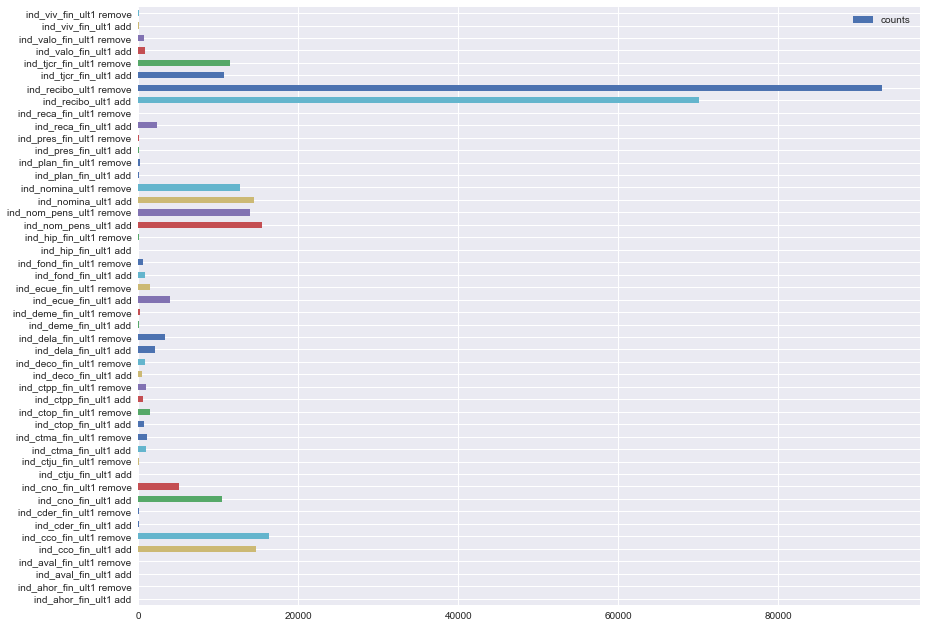

In [63]:
df_counts_recibo.plot(y='counts', kind='barh', figsize=(14,11))

In [226]:
#fig, ax = plt.subplots(figsize=(14,11))
#ax = sns.barplot(x=df_counts_recibo.counts, y=df_counts_recibo.index.values, orient='h')

In [228]:
#df_counts_recibo.plot(y='mean', kind='barh', figsize=(14,11))

# ind_nom_pens_ult1 (Pensions, 22)

In [65]:
idx_prod = 22
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_nom_pens = pd.DataFrame.from_dict(d_product, orient='index')

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [66]:
df_nom_pens.sort_values('counts', ascending=False).head(15)

,counts,mean
ind_nom_pens_ult1 remove,53528,1.111250
ind_nomina_ult1 remove,43501,1.156134
ind_nom_pens_ult1 add,35938,2.493238
ind_recibo_ult1 add,16058,2.307884
ind_cno_fin_ult1 add,13722,2.811106
ind_cco_fin_ult1 remove,12521,2.863909
ind_recibo_ult1 remove,11442,2.321185
ind_tjcr_fin_ult1 remove,9248,2.584343
ind_tjcr_fin_ult1 add,9200,2.600435
ind_cno_fin_ult1 remove,7080,2.375847


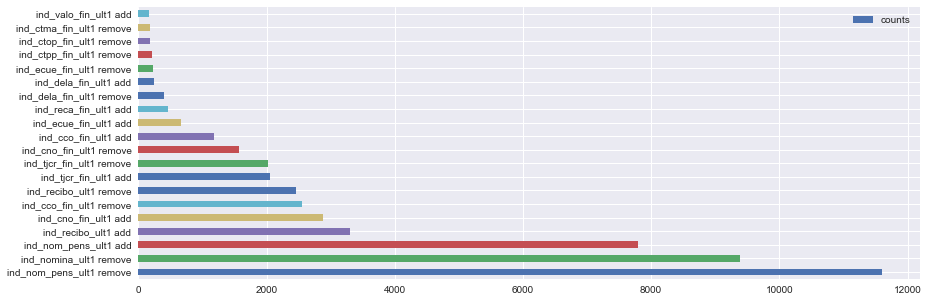

In [336]:
df_nom_pens.sort_values('counts', ascending=False).head(20).plot(y='counts', kind='barh', figsize=(14,5))

# ind_nomina_ult1 (Payroll, 21)

In [67]:
idx_prod = 21
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_nomina = pd.DataFrame.from_dict(d_product, orient='index')
df_nomina.sort_values('counts', ascending=False).head(15)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_nomina_ult1 remove,43347,1.144577
ind_nom_pens_ult1 remove,43264,1.144531
ind_nom_pens_ult1 add,29671,2.473257
ind_nomina_ult1 add,29613,2.495222
ind_recibo_ult1 add,14641,2.308312
ind_cno_fin_ult1 add,12312,2.836014
ind_cco_fin_ult1 remove,11665,2.872610
ind_recibo_ult1 remove,10460,2.331262
ind_tjcr_fin_ult1 remove,7821,2.603631
ind_tjcr_fin_ult1 add,7794,2.616243


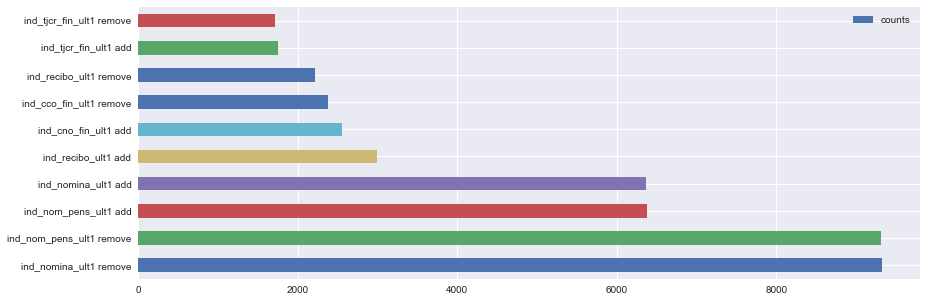

In [261]:
df_nomina.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_cco_fin_ult1 (Current Accounts, 2)

In [68]:
idx_prod = 2
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_cco_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_cco_fin.sort_values('counts', ascending=False)#.head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_cco_fin_ult1 remove,29532,1.181904
ind_cco_fin_ult1 add,10901,2.429961
ind_recibo_ult1 add,9682,2.145631
ind_recibo_ult1 remove,8415,2.058229
ind_nom_pens_ult1 remove,4261,2.268247
ind_nomina_ult1 remove,3992,2.273046
ind_tjcr_fin_ult1 remove,3395,2.130781
ind_tjcr_fin_ult1 add,3333,2.354335
ind_nom_pens_ult1 add,2757,2.678636
ind_ecue_fin_ult1 add,2743,1.935108


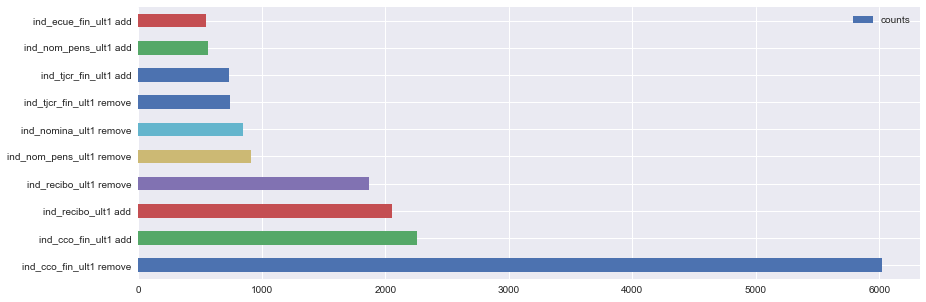

In [263]:
df_cco_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_tjcr_fin_ult1 (Credit Card, 18)

In [264]:
idx_prod = 18
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_tjcr_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_tjcr_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_tjcr_fin_ult1 remove,1.211890,10227
ind_tjcr_fin_ult1 add,2.465019,6961
ind_nom_pens_ult1 add,2.361863,2255
ind_recibo_ult1 add,2.226050,2119
ind_nom_pens_ult1 remove,2.539272,2088
ind_nomina_ult1 add,2.429719,1992
ind_recibo_ult1 remove,2.250628,1991
ind_nomina_ult1 remove,2.623632,1828
ind_cco_fin_ult1 remove,2.750739,1015
ind_cno_fin_ult1 add,2.874856,871


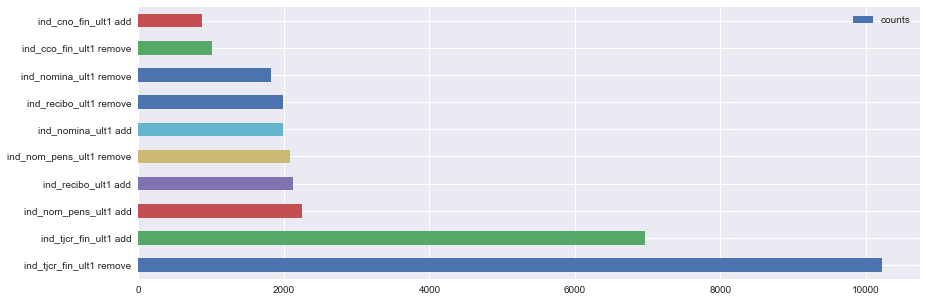

In [265]:
df_tjcr_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_cno_fin_ult1 (Payroll Account, 4)

In [11]:
idx_prod = 4
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_cno_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_cno_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_nom_pens_ult1 add,12233,1.755497
ind_cno_fin_ult1 remove,11697,1.221852
ind_nomina_ult1 add,11150,1.738027
ind_recibo_ult1 add,7379,1.966120
ind_nom_pens_ult1 remove,6140,2.388925
ind_cno_fin_ult1 add,5904,2.779133
ind_nomina_ult1 remove,5113,2.387248
ind_cco_fin_ult1 add,4707,1.876567
ind_recibo_ult1 remove,4664,2.106990
ind_cco_fin_ult1 remove,3529,2.895721


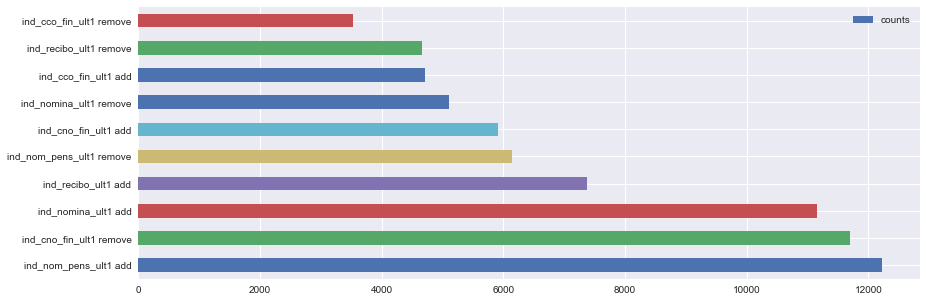

In [12]:
df_cno_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_ecue_fin_ult1 (e-account, 12)

In [13]:
idx_prod = 12
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_ecue_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_ecue_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_ecue_fin_ult1 remove,5061,1.191069
ind_cco_fin_ult1 remove,4763,1.744909
ind_ctma_fin_ult1 add,4486,1.445609
ind_cco_fin_ult1 add,3341,1.801556
ind_recibo_ult1 add,3261,1.873352
ind_nom_pens_ult1 add,2545,1.994499
ind_nomina_ult1 add,2309,2.005630
ind_tjcr_fin_ult1 add,2012,2.222664
ind_recibo_ult1 remove,1984,2.051915
ind_ecue_fin_ult1 add,1900,2.625263


Text(0.5,0,'Counts')

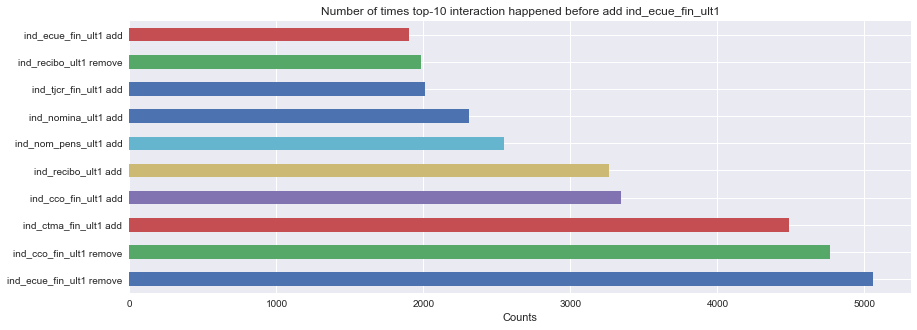

In [46]:
#df_ecue_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

plot_title = 'Number of times top-10 interaction happened before add ind_ecue_fin_ult1'
ax = df_ecue_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5), title=plot_title, legend=False)
ax.set_xlabel("Counts")
#ax.set_ylabel("interaction")

In [341]:
df_train[df_train.ncodpers == 75602][product_columns]

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
396623,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
856929,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1458654,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2112766,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2913478,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3545619,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4107850,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5340076,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
5728144,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6882705,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [342]:
np.where(df_train[df_train.ncodpers == 75602][product_columns].astype(np.float32).diff().fillna(0).values != 0)

(array([ 1,  2,  3,  5,  6,  7, 14, 16], dtype=int64),
 array([18, 18, 18, 18, 18, 18, 18, 18], dtype=int64))

# ind_dela_fin_ult1 (Long-term deposits, 11)

In [30]:
idx_prod = 11
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_dela_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_dela_fin.sort_values('counts', ascending=False).head(20)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_dela_fin_ult1 remove,2416,1.251656
ind_cco_fin_ult1 add,1072,1.345149
ind_recibo_ult1 add,856,1.808411
ind_cco_fin_ult1 remove,810,1.545679
ind_tjcr_fin_ult1 add,807,1.919455
ind_recibo_ult1 remove,800,1.617500
ind_tjcr_fin_ult1 remove,771,1.856031
ind_deco_fin_ult1 add,632,1.395570
ind_ecue_fin_ult1 add,627,1.381180
ind_nom_pens_ult1 add,511,1.726027


Text(0.5,0,'Counts')

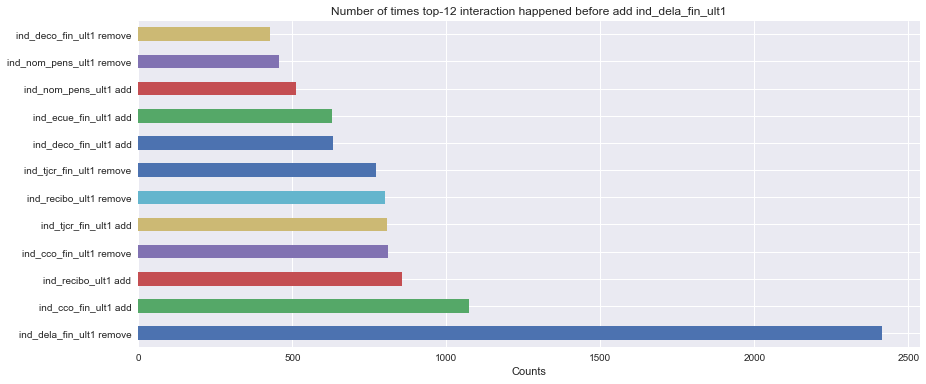

In [44]:
plot_title = 'Number of times top-12 interaction happened before add ind_dela_fin_ult1'
ax = df_dela_fin.sort_values('counts', ascending=False).head(12).plot(y='counts', kind='barh', figsize=(14,6), title=plot_title, legend=False)
ax.set_xlabel("Counts")
#ax.set_ylabel("interaction")

# ind_reca_fin_ult1 (Taxes, 17)

In [51]:
idx_prod = 17
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_reca_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_reca_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_recibo_ult1 add,1957,1.622381
ind_nom_pens_ult1 add,1355,1.822878
ind_nomina_ult1 add,1224,1.811275
ind_nom_pens_ult1 remove,1126,1.698046
ind_recibo_ult1 remove,1077,1.849582
ind_nomina_ult1 remove,986,1.777890
ind_tjcr_fin_ult1 add,901,1.815760
ind_cco_fin_ult1 remove,895,2.173184
ind_cco_fin_ult1 add,778,1.647815
ind_tjcr_fin_ult1 remove,771,1.741894


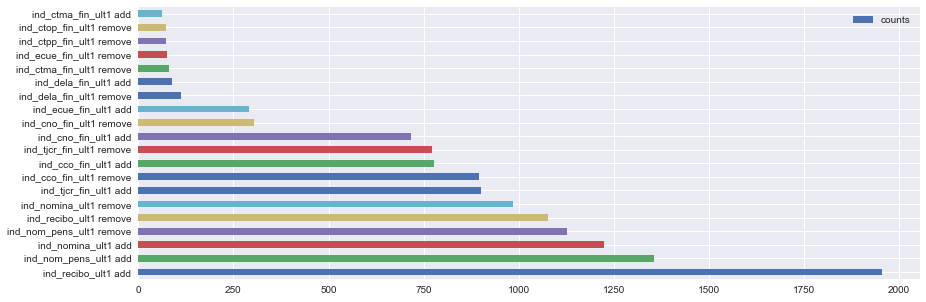

In [53]:
df_reca_fin.sort_values('counts', ascending=False).head(20).plot(y='counts', kind='barh', figsize=(14,5))

# ind_ctma_fin_ult1 (	Más particular Account, 6)

In [54]:
idx_prod = 6
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_ctma_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_ctma_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_cco_fin_ult1 add,735,1.179592
ind_ctma_fin_ult1 remove,396,1.388889
ind_cco_fin_ult1 remove,303,1.653465
ind_nom_pens_ult1 add,284,1.669014
ind_nomina_ult1 add,252,1.698413
ind_recibo_ult1 add,212,1.910377
ind_tjcr_fin_ult1 add,206,2.019417
ind_nom_pens_ult1 remove,201,2.283582
ind_tjcr_fin_ult1 remove,194,2.051546
ind_nomina_ult1 remove,171,2.187135


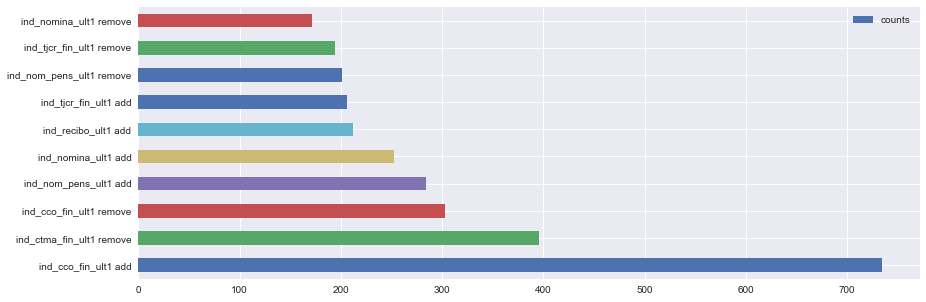

In [55]:
df_ctma_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_valo_fin_ult1 (Securities, 19)

In [23]:
idx_prod = 19
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_valo_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_valo_fin.sort_values('counts', ascending=False).head(35)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_valo_fin_ult1 remove,1109,1.392245
ind_recibo_ult1 add,961,1.642040
ind_cco_fin_ult1 add,948,1.633966
ind_cno_fin_ult1 remove,714,1.570028
ind_tjcr_fin_ult1 add,665,2.082707
ind_tjcr_fin_ult1 remove,650,2.232308
ind_nom_pens_ult1 add,579,2.020725
ind_nomina_ult1 add,497,2.006036
ind_recibo_ult1 remove,484,2.041322
ind_valo_fin_ult1 add,473,2.575053


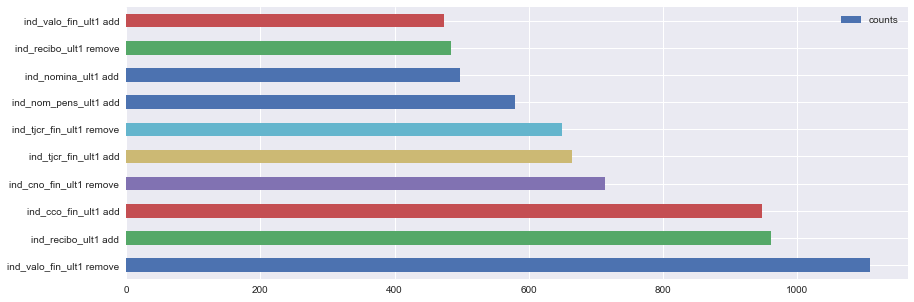

In [20]:
df_valo_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_ctop_fin_ult1 (particular Account, 7)

In [56]:
idx_prod = 7
d_product = {}
for key in data_previous_interactions[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions[idx_prod][key])
df_ctop_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_ctop_fin.sort_values('counts', ascending=False).head(15)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_ctop_fin_ult1 remove,2291,1.227412
ind_ctop_fin_ult1 add,748,2.786096
ind_cco_fin_ult1 remove,603,2.111111
ind_tjcr_fin_ult1 add,534,2.537453
ind_tjcr_fin_ult1 remove,505,2.431683
ind_cco_fin_ult1 add,489,2.075665
ind_recibo_ult1 add,434,2.131336
ind_nom_pens_ult1 remove,418,2.535885
ind_recibo_ult1 remove,408,2.178922
ind_nom_pens_ult1 add,403,2.409429


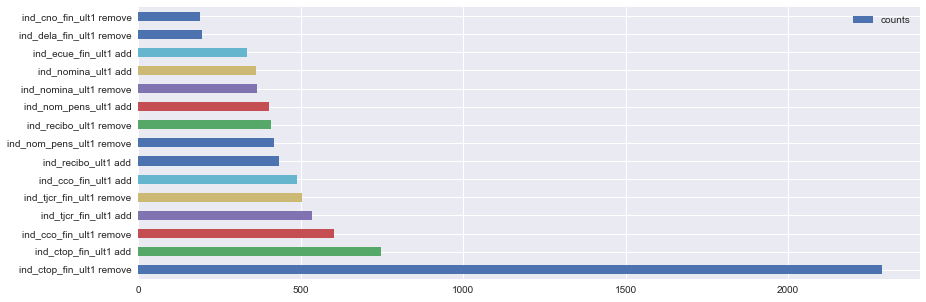

In [57]:
df_ctop_fin.sort_values('counts', ascending=False).head(15).plot(y='counts', kind='barh', figsize=(14,5))

# Investigate less frequent products

In [58]:
products_to_inspect_2 = ['ind_fond_fin_ult1', 'ind_deco_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_plan_fin_ult1', 
                       'ind_ctju_fin_ult1', 'ind_deme_fin_ult1', 'ind_pres_fin_ult1', 'ind_cder_fin_ult1', 
                        'ind_hip_fin_ult1', 'ind_viv_fin_ult1']

idx_products_to_inspect_2 = [product_columns.index(prod) for prod in products_to_inspect_2]
print(idx_products_to_inspect_2)

data_previous_interactions_2 = {}
for prod in idx_products_to_inspect_2:
    data_previous_interactions_2[prod] = {}
    for i in range(48):
        data_previous_interactions_2[prod][i] = []


sample_ncodpers = df_train['ncodpers'].sample(920000).values


users_processed = []
#for ncodpers,group in df_train[df_train['ncodpers'].isin(sample_ncodpers)].groupby('ncodpers'):
for ncodpers,group in df_train.groupby('ncodpers'):
    group_sorted = group.sort_values('fecha_dato')
    interactions = group_sorted[product_columns].astype(np.int32).diff().fillna(0).values
    interactions_mask = np.sum(np.abs(interactions), axis = 1) > 0
    interactions = interactions[interactions_mask > 0, :] # Remove if we want to include the times
    nInteractions = np.sum(np.abs(interactions))
    user_interaction_list = []
    
    if nInteractions > 0:
        if len(interactions) > 1:
            if len(np.where(interactions[1:] == 1)[0]) > 0: # We look that there is some positive interaction after the first one, otherwise we don't have anything to learn
                d_interactions_last_t = {}
                idx_pos_interactions = []
                for t in range(len(interactions)):
                    # temporal features (interactions)
                    added = np.where(interactions[t] == 1)[0]
                    removed = np.where(interactions[t] == -1)[0] + 24
                    interactions_joined = list(added) + list(removed)
                    
                    # NEW IMPLEMENTATION
                    for interaction_id in interactions_joined:
                        # Save the added product and the last times of previous other interactions
                        if t > 0:
                            if interaction_id in idx_products_to_inspect_2:
                                for interaction_id_before in d_interactions_last_t.keys():
                                    last_t = d_interactions_last_t[interaction_id_before]
                                    if (t - last_t) > 0:
                                        data_previous_interactions_2[interaction_id][interaction_id_before].append(t - last_t)
                        # Save last time of this interaction
                        d_interactions_last_t[interaction_id] = t
                    # END NEW IMPLEMENTATION
                                   
                    
                    if len(interactions_joined) > 0:
                        user_interaction_list.append(interactions_joined)
                        # user_interaction_list.append((t, interactions_joined)) Use this if we want to include the times
                    if len(added) > 0:
                        idx_pos_interactions.append(len(user_interaction_list) - 1)

    users_processed.append(ncodpers)
        
    if len(users_processed) % 5000 == 0:
        print(len(users_processed))
    

with open("pickles/data_previous_interactions_2.pickle", 'wb') as handle:
    pickle.dump(data_previous_interactions_2, handle, protocol=pickle.HIGHEST_PROTOCOL)

[13, 9, 8, 15, 5, 10, 16, 3, 14, 20]
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705

In [306]:
len(users_processed)

956645

In [307]:
len(sample_ncodpers)

920000

# ind_fond_fin_ult1 (Funds, 13)

In [308]:
idx_prod = 13
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_fond_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_fond_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_fond_fin_ult1 remove,1.495017,301
ind_tjcr_fin_ult1 add,1.864769,281
ind_tjcr_fin_ult1 remove,1.884477,277
ind_recibo_ult1 add,1.814815,270
ind_dela_fin_ult1 remove,1.398496,266
ind_cco_fin_ult1 add,1.518797,266
ind_recibo_ult1 remove,1.770925,227
ind_nom_pens_ult1 add,1.622222,225
ind_dela_fin_ult1 add,1.204762,210
ind_nom_pens_ult1 remove,1.973822,191


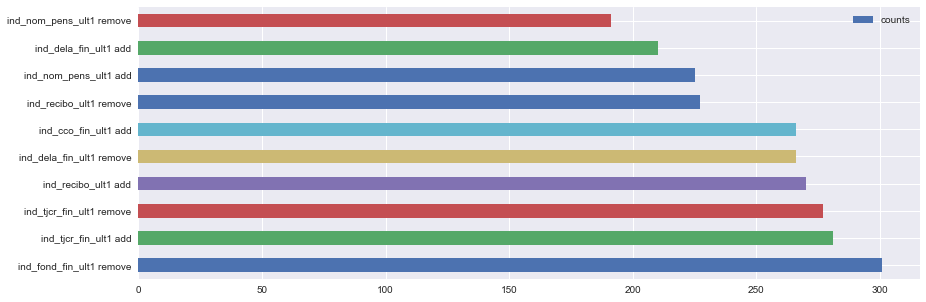

In [309]:
df_fond_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_deco_fin_ult1 (Short-term deposits, 9)

In [310]:
idx_prod = 9
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_deco_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_deco_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_cco_fin_ult1 add,1.026087,115
ind_cco_fin_ult1 remove,1.428571,35
ind_deco_fin_ult1 remove,1.217391,23
ind_recibo_ult1 add,1.368421,19
ind_ecue_fin_ult1 add,1.222222,9
ind_cno_fin_ult1 add,1.250000,8
ind_deco_fin_ult1 add,2.125000,8
ind_nomina_ult1 add,1.428571,7
ind_nom_pens_ult1 add,1.500000,6
ind_ecue_fin_ult1 remove,1.666667,6


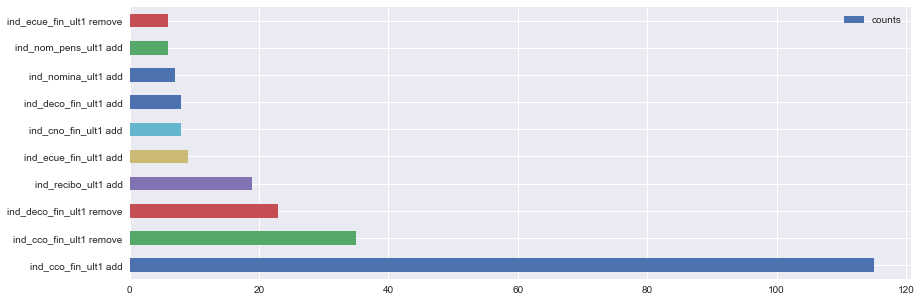

In [311]:
df_deco_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

In [312]:
df_deco_fin.counts.sum() # !!!

276

# ind_ctpp_fin_ult1 (particular Plus Account, 8)

In [313]:
idx_prod = 8
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_ctpp_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_ctpp_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_ctpp_fin_ult1 remove,1.245578,1470
ind_ctpp_fin_ult1 add,2.868304,448
ind_tjcr_fin_ult1 remove,2.428224,411
ind_tjcr_fin_ult1 add,2.502525,396
ind_nom_pens_ult1 add,2.491139,395
ind_nom_pens_ult1 remove,2.524804,383
ind_nomina_ult1 add,2.562500,352
ind_nomina_ult1 remove,2.573574,333
ind_recibo_ult1 add,2.296970,330
ind_recibo_ult1 remove,2.270769,325


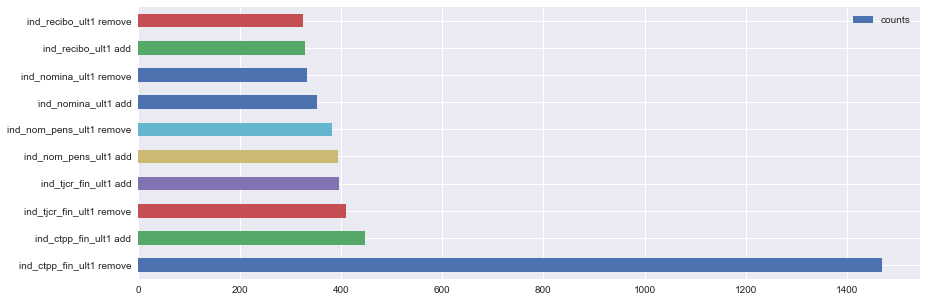

In [314]:
df_ctpp_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_plan_fin_ult1 (pension, 15)

In [59]:
idx_prod = 15
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_plan_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_plan_fin.sort_values('counts', ascending=False).head(25)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,counts,mean
ind_tjcr_fin_ult1 add,125,2.056000
ind_tjcr_fin_ult1 remove,110,2.063636
ind_recibo_ult1 add,106,1.830189
ind_nom_pens_ult1 add,103,1.902913
ind_nomina_ult1 add,99,1.898990
ind_nom_pens_ult1 remove,75,2.240000
ind_nomina_ult1 remove,73,2.273973
ind_recibo_ult1 remove,70,1.900000
ind_cno_fin_ult1 add,68,2.000000
ind_cco_fin_ult1 add,66,1.863636


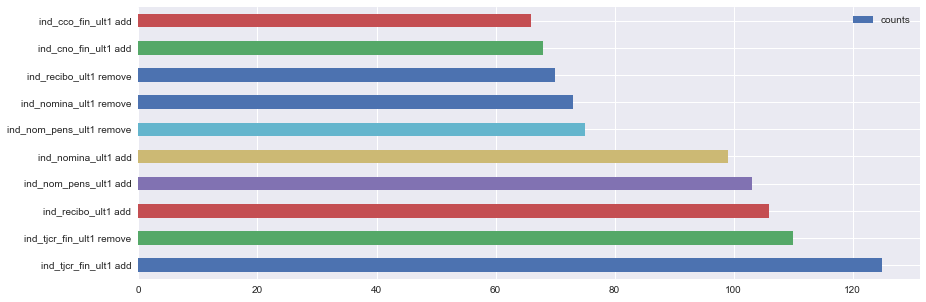

In [316]:
df_plan_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_ctju_fin_ult1 (	Junior Account, 5)

In [317]:
idx_prod = 5
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_ctju_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_ctju_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_ctju_fin_ult1 remove,1.0,175
ind_ctju_fin_ult1 add,2.0,38
ind_ecue_fin_ult1 add,1.0,2
ind_cco_fin_ult1 add,1.0,1
ind_nom_pens_ult1 add,1.0,1
ind_pres_fin_ult1 remove,NaN,0
ind_hip_fin_ult1 add,NaN,0
ind_hip_fin_ult1 remove,NaN,0
ind_nom_pens_ult1 remove,NaN,0
ind_nomina_ult1 add,NaN,0


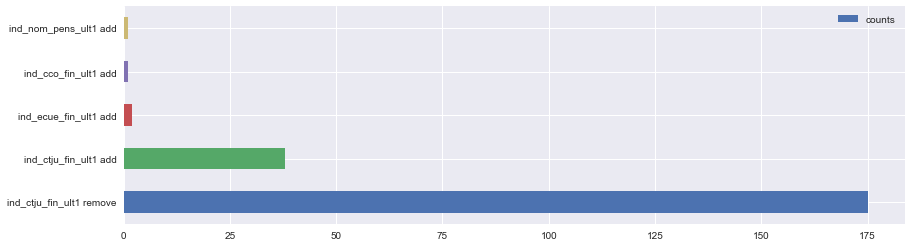

In [319]:
df_ctju_fin.sort_values('counts', ascending=False).head(5).plot(y='counts', kind='barh', figsize=(14,4))

# ind_deme_fin_ult1 (Medium-term deposits, 10)

In [320]:
idx_prod = 10
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_deme_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_deme_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_dela_fin_ult1 remove,1.103448,29
ind_recibo_ult1 add,1.695652,23
ind_deme_fin_ult1 remove,1.318182,22
ind_recibo_ult1 remove,1.578947,19
ind_cco_fin_ult1 add,1.333333,15
ind_tjcr_fin_ult1 add,1.571429,14
ind_nomina_ult1 remove,1.833333,12
ind_nom_pens_ult1 remove,1.833333,12
ind_tjcr_fin_ult1 remove,1.333333,12
ind_deco_fin_ult1 remove,1.111111,9


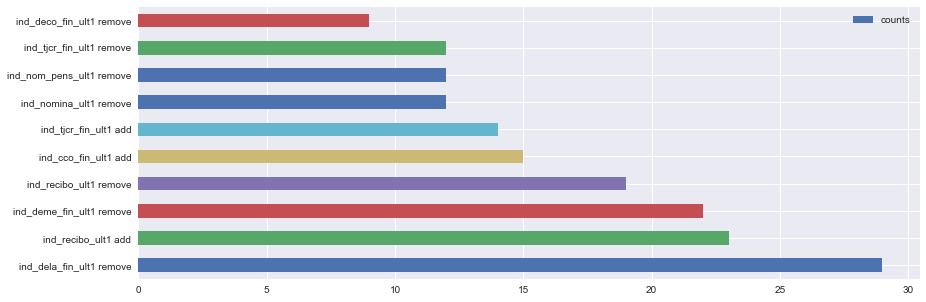

In [321]:
df_deme_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_pres_fin_ult1 (Loans, 16)

In [322]:
idx_prod = 16
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_pres_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_pres_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_pres_fin_ult1 remove,1.312500,48
ind_nom_pens_ult1 add,1.920000,25
ind_pres_fin_ult1 add,2.478261,23
ind_tjcr_fin_ult1 add,2.863636,22
ind_recibo_ult1 add,1.666667,21
ind_tjcr_fin_ult1 remove,2.571429,21
ind_nomina_ult1 add,1.850000,20
ind_cco_fin_ult1 remove,1.736842,19
ind_nom_pens_ult1 remove,2.176471,17
ind_recibo_ult1 remove,1.800000,15


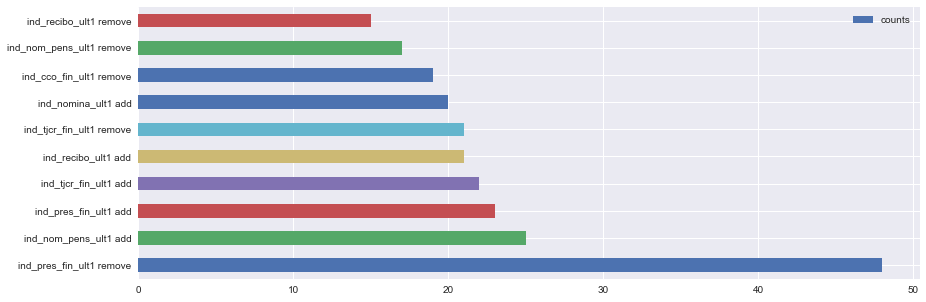

In [323]:
df_pres_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_cder_fin_ult1 (Derivada Account, 3)

In [324]:
idx_prod = 3
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_cder_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_cder_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_cder_fin_ult1 remove,1.294118,34
ind_cder_fin_ult1 add,2.739130,23
ind_tjcr_fin_ult1 add,1.833333,18
ind_recibo_ult1 remove,1.812500,16
ind_recibo_ult1 add,1.800000,15
ind_tjcr_fin_ult1 remove,1.466667,15
ind_valo_fin_ult1 add,3.076923,13
ind_nom_pens_ult1 add,1.700000,10
ind_ecue_fin_ult1 add,1.777778,9
ind_cco_fin_ult1 add,1.777778,9


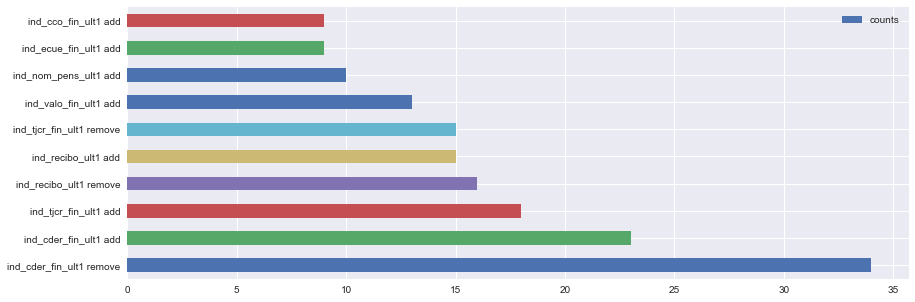

In [325]:
df_cder_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_hip_fin_ult1 (Mortgage, 14)

In [326]:
idx_prod = 14
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_hip_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_hip_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_tjcr_fin_ult1 add,1.312500,16
ind_recibo_ult1 add,1.727273,11
ind_tjcr_fin_ult1 remove,2.000000,10
ind_nom_pens_ult1 add,2.222222,9
ind_nom_pens_ult1 remove,1.750000,8
ind_cco_fin_ult1 add,1.375000,8
ind_dela_fin_ult1 remove,1.625000,8
ind_nomina_ult1 add,2.000000,7
ind_cno_fin_ult1 remove,2.285714,7
ind_cco_fin_ult1 remove,2.333333,6


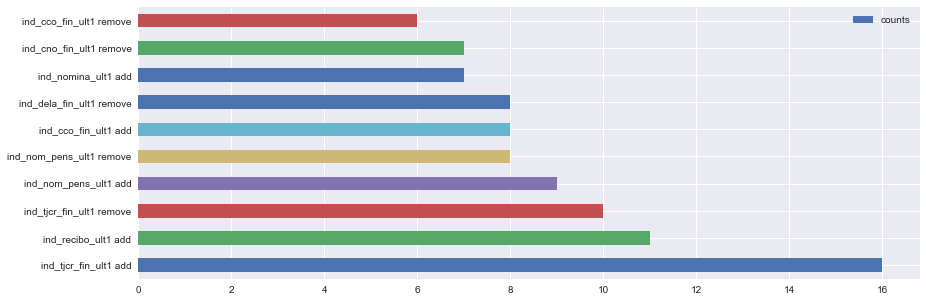

In [327]:
df_hip_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# ind_viv_fin_ult1 (Home Account, 20)

In [328]:
idx_prod = 20
d_product = {}
for key in data_previous_interactions_2[idx_prod].keys():
    if key < len(product_columns):
        str_interaction = product_columns[key] + ' add'
    else:
        str_interaction = product_columns[key-len(product_columns)] + ' remove'
    d_product[str_interaction] = {}
    d_product[str_interaction]['counts'] = len(data_previous_interactions_2[idx_prod][key])
    d_product[str_interaction]['mean'] = np.mean(data_previous_interactions_2[idx_prod][key])
df_viv_fin = pd.DataFrame.from_dict(d_product, orient='index')
df_viv_fin.sort_values('counts', ascending=False).head(10)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,counts
ind_viv_fin_ult1 remove,1.416667,36
ind_tjcr_fin_ult1 remove,2.000000,12
ind_cco_fin_ult1 remove,1.700000,10
ind_nomina_ult1 remove,3.555556,9
ind_nomina_ult1 add,2.888889,9
ind_nom_pens_ult1 remove,3.555556,9
ind_nom_pens_ult1 add,2.888889,9
ind_recibo_ult1 add,2.375000,8
ind_ctpp_fin_ult1 remove,3.375000,8
ind_ctop_fin_ult1 remove,3.000000,7


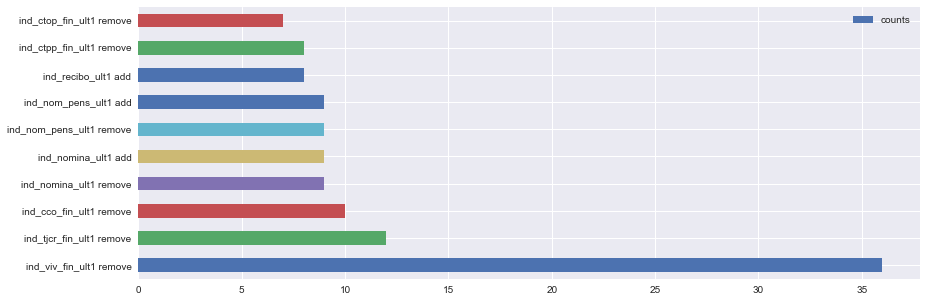

In [329]:
df_viv_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

# Look data of individual customers

In [119]:
pd.options.display.max_columns= 100
df_train[df_train.ncodpers == 352085][product_columns]

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
388997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
866671,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1504486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2119248,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2903616,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3534776,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4215908,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5362106,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5744469,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6781294,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# What happens after removing Junior Account?

In [69]:
ncodpers_juniorAccount = df_train[df_train.ind_ctju_fin_ult1 == 1].ncodpers.unique()

In [71]:
len(ncodpers_juniorAccount)

8855

In [109]:
products_add_after_added_junior_acc = []
products_remove_after_added_current_acc = []
for ncodpers,group in df_train[df_train.ncodpers.isin(ncodpers_juniorAccount)].groupby('ncodpers'):
    group_interactions = group[product_columns].astype(np.float32).diff().fillna(0)
    # Customer added junior account
    if 1 in group_interactions.ind_ctju_fin_ult1.values:
        times_added_ctju = np.where(group_interactions.ind_ctju_fin_ult1.values == 1)[0]
        # for t in times_added_ctju:
        t = times_added_ctju[0]
        after_t = group_interactions.values[(t+1):]
        added_after_t = np.where(after_t == 1)[1]
        products_add_after_added_junior_acc.extend(list(added_after_t))
    # Customer removed junior account
    if -1 in group_interactions.ind_ctju_fin_ult1.values:
        times_removed_ctju = np.where(group_interactions.ind_ctju_fin_ult1.values == -1)[0]
        # for t in times_removed_ctju:
        t = times_removed_ctju[0]
        after_t = group_interactions.values[(t+1):]
        added_after_t = np.where(after_t == 1)[1]
        products_remove_after_added_current_acc.extend(list(added_after_t)) 

In [110]:
from collections import Counter
counts_added_junior_acc= Counter(products_add_after_added_junior_acc)

for i,count in counts_added_junior_acc.most_common():
    print(product_columns[i] + ': ' + str(count))

ind_ctju_fin_ult1: 38
ind_nom_pens_ult1: 18
ind_ecue_fin_ult1: 16
ind_cco_fin_ult1: 9
ind_cno_fin_ult1: 3
ind_reca_fin_ult1: 1
ind_fond_fin_ult1: 1
ind_nomina_ult1: 1


In [115]:
from collections import Counter
counts_removed_junior_acc= Counter(products_remove_after_added_current_acc)

d_junior_account = {}
for i,count in counts_removed_junior_acc.most_common():
    print(product_columns[i] + ': ' + str(count))
    d_junior_account[product_columns[i]]= {}
    d_junior_account[product_columns[i]]['counts'] = count
df_junior_account = pd.DataFrame.from_dict(d_junior_account, orient='index')
df_junior_account.sort_values('counts', ascending=False).head(10)

ind_cco_fin_ult1: 346
ind_ctju_fin_ult1: 175
ind_cno_fin_ult1: 167
ind_recibo_ult1: 82
ind_ecue_fin_ult1: 47
ind_nom_pens_ult1: 41
ind_nomina_ult1: 17
ind_tjcr_fin_ult1: 13
ind_dela_fin_ult1: 7
ind_reca_fin_ult1: 4
ind_ctma_fin_ult1: 3
ind_fond_fin_ult1: 1
ind_valo_fin_ult1: 1


,counts
ind_cco_fin_ult1,346
ind_ctju_fin_ult1,175
ind_cno_fin_ult1,167
ind_recibo_ult1,82
ind_ecue_fin_ult1,47
ind_nom_pens_ult1,41
ind_nomina_ult1,17
ind_tjcr_fin_ult1,13
ind_dela_fin_ult1,7
ind_reca_fin_ult1,4


Text(0.5,0,'Counts')

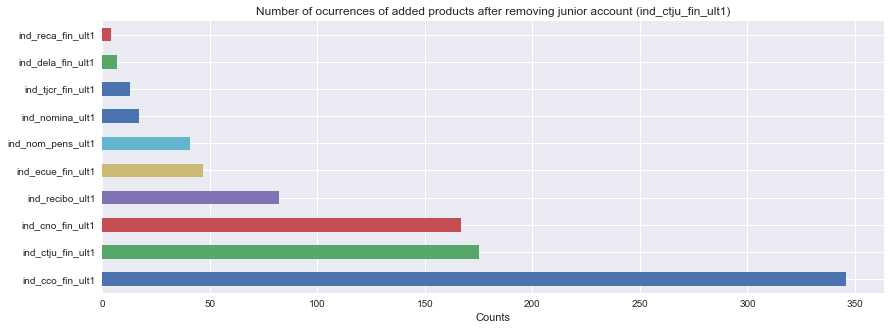

In [118]:
#df_ecue_fin.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5))

plot_title = 'Number of ocurrences of added products after removing junior account (ind_ctju_fin_ult1)'
ax = df_junior_account.sort_values('counts', ascending=False).head(10).plot(y='counts', kind='barh', figsize=(14,5), title=plot_title, legend=False)
ax.set_xlabel("Counts")
#ax.set_ylabel("interaction")